# Explorando Dados com R

Pacotes necessários: `tidyverse` e `dslabs`

In [1]:
install.packages(c("tidyverse", "dslabs"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
library(tidyverse)
library(dslabs)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.4
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



Utilizaremos dados existentes na base de dados do pacote `dslabs` para demonstramos algumas funções. Para ver outras bases de dados consulte [este link](https://cran.r-project.org/web/packages/dslabs/dslabs.pdf).

In [3]:
data(murders)

Para consultar o tipo de dado:

In [4]:
class(murders)

[1] "data.frame"

In [5]:
v <- 5.0
class(v)

[1] "numeric"

Para visualizar a estrutura dos dados ou consultar de que se tratam os dados:

In [6]:
str(murders)

'data.frame':	51 obs. of  5 variables:
 $ state     : chr  "Alabama" "Alaska" "Arizona" "Arkansas" ...
 $ abb       : chr  "AL" "AK" "AZ" "AR" ...
 $ region    : Factor w/ 4 levels "Northeast","South",..: 2 4 4 2 4 4 1 2 2 2 ...
 $ population: num  4779736 710231 6392017 2915918 37253956 ...
 $ total     : num  135 19 232 93 1257 ...


In [7]:
help(murders)

Para visualizar o cabeçalho utilize `head`

In [8]:
head(murders)

,state,abb,region,population,total
,<chr>,<chr>,<fct>,<dbl>,<dbl>
1,Alabama,AL,South,4779736,135
2,Alaska,AK,West,710231,19
3,Arizona,AZ,West,6392017,232
4,Arkansas,AR,South,2915918,93
5,California,CA,West,37253956,1257
6,Colorado,CO,West,5029196,65


In [ ]:
murders

Dessa forma é possível trabalhar com cada dimensão separadamente, utilizando `$`:

In [10]:
murders$population

[1]  4779736   710231  6392017  2915918 37253956  5029196  3574097   897934
 [9]   601723 19687653  9920000  1360301  1567582 12830632  6483802  3046355
[17]  2853118  4339367  4533372  1328361  5773552  6547629  9883640  5303925
[25]  2967297  5988927   989415  1826341  2700551  1316470  8791894  2059179
[33] 19378102  9535483   672591 11536504  3751351  3831074 12702379  1052567
[41]  4625364   814180  6346105 25145561  2763885   625741  8001024  6724540
[49]  1852994  5686986   563626

Para saber os nomes de cada dimensão utilize `names`

In [11]:
names(murders)

[1] "state"      "abb"        "region"     "population" "total"

In [12]:
pop <- murders$population
reg <- murders$region

In [13]:
length(pop)

[1] 51

In [15]:
class(pop)
class(reg)
class(murders$state)

[1] "numeric"

[1] "factor"

[1] "character"

In [16]:
reg

[1] South         West          West          South         West         
 [6] West          Northeast     South         South         South        
[11] South         West          West          North Central North Central
[16] North Central North Central South         South         Northeast    
[21] South         Northeast     North Central North Central South        
[26] North Central West          North Central West          Northeast    
[31] Northeast     West          Northeast     South         North Central
[36] North Central South         West          Northeast     Northeast    
[41] South         North Central South         South         West         
[46] Northeast     South         West          South         North Central
[51] West         
Levels: Northeast South North Central West

Podemos utilizar `reorder` para ordenar os dados de acordo com um determinado valor e separá-los do menor para maior utilizando `levels`.

In [17]:
value <- murders$total
reg <- reorder(reg, value, FUN = sum)
reg
levels(reg)

[1] South         West          West          South         West         
 [6] West          Northeast     South         South         South        
[11] South         West          West          North Central North Central
[16] North Central North Central South         South         Northeast    
[21] South         Northeast     North Central North Central South        
[26] North Central West          North Central West          Northeast    
[31] Northeast     West          Northeast     South         North Central
[36] North Central South         West          Northeast     Northeast    
[41] South         North Central South         South         West         
[46] Northeast     South         West          South         North Central
[51] West         
attr(,"scores")
    Northeast         South North Central          West 
         1469          4195          1828          1911 
Levels: Northeast North Central West South

[1] "Northeast"     "North Central" "West"          "South"

Pode-se também usar `sort` para ordenação.

In [18]:
sort(murders$total)

[1]    2    4    5    5    7    8   11   12   12   16   19   21   22   27   32
[16]   36   38   53   63   65   67   84   93   93   97   97   99  111  116  118
[31]  120  135  142  207  219  232  246  250  286  293  310  321  351  364  376
[46]  413  457  517  669  805 1257

Pode-se selecionar um subset do dados usando operador colchetes

In [21]:
murders$state[1:6]

[1] "Alabama"    "Alaska"     "Arizona"    "Arkansas"   "California"
[6] "Colorado"

Um determinado valor máximo pode ser facilmente adquirido usando `max`

In [22]:
max(murders$total)

[1] 1257

Assim como podemos encontrar o índice onde algo acontece usando `which`

In [23]:
i_max <- which.max(murders$total)
murders$state[i_max]

[1] "California"

In [25]:
i_west <- which(murders$region=="West")
i_west
murders$state[i_west]

[1]  2  3  5  6 12 13 27 29 32 38 45 48 51

[1] "Alaska"     "Arizona"    "California" "Colorado"   "Hawaii"    
 [6] "Idaho"      "Montana"    "Nevada"     "New Mexico" "Oregon"    
[11] "Utah"       "Washington" "Wyoming"

In [26]:
murder_rate <- murders$total / murders$population * 100000
murder_rate

[1]  2.8244238  2.6751860  3.6295273  3.1893901  3.3741383  1.2924531
 [7]  2.7139722  4.2319369 16.4527532  3.3980688  3.7903226  0.5145920
[13]  0.7655102  2.8369608  2.1900730  0.6893484  2.2081106  2.6732010
[19]  7.7425810  0.8280881  5.0748655  1.8021791  4.1786225  0.9992600
[25]  4.0440846  5.3598917  1.2128379  1.7521372  3.1104763  0.3798036
[31]  2.7980319  3.2537239  2.6679599  2.9993237  0.5947151  2.6871225
[37]  2.9589340  0.9396843  3.5977513  1.5200933  4.4753235  0.9825837
[43]  3.4509357  3.2013603  0.7959810  0.3196211  3.1246001  1.3829942
[49]  1.4571013  1.7056487  0.8871131

In [27]:
ind <- which(murders$state == "California")
murder_rate[ind]

[1] 3.374138

In [28]:
ind <- murder_rate <= 0.71
ind
sum(ind)
murders$state[ind]

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE
[13] FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[25] FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE  TRUE FALSE
[37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE
[49] FALSE FALSE FALSE

[1] 5

[1] "Hawaii"        "Iowa"          "New Hampshire" "North Dakota" 
[5] "Vermont"

In [29]:
west <- murders$region == "West"
safe <- murder_rate <= 1
ind <- safe & west
murders$state[ind]

[1] "Hawaii"  "Idaho"   "Oregon"  "Utah"    "Wyoming"

In [30]:
ind <- match(c("New York", "Florida", "Texas"), murders$state)
ind
murder_rate[ind]

[1] 33 10 44

[1] 2.667960 3.398069 3.201360

In [31]:
c("Boston", "Dakota", "Washington") %in% murders$state

[1] FALSE FALSE  TRUE

In [32]:
match(c("New York", "Florida", "Texas"), murders$state)
which(murders$state%in%c("New York", "Florida", "Texas"))

[1] 33 10 44

[1] 10 33 44

Podemos também adicionar colunas aos dados iniciais utilizando `mutate`

In [33]:
head(murders)

,state,abb,region,population,total
,<chr>,<chr>,<fct>,<dbl>,<dbl>
1,Alabama,AL,South,4779736,135
2,Alaska,AK,West,710231,19
3,Arizona,AZ,West,6392017,232
4,Arkansas,AR,South,2915918,93
5,California,CA,West,37253956,1257
6,Colorado,CO,West,5029196,65


In [34]:
murders <- mutate(murders, rate = total / population * 100000)
head(murders)

,state,abb,region,population,total,rate
,<chr>,<chr>,<fct>,<dbl>,<dbl>,<dbl>
1,Alabama,AL,South,4779736,135,2.824424
2,Alaska,AK,West,710231,19,2.675186
3,Arizona,AZ,West,6392017,232,3.629527
4,Arkansas,AR,South,2915918,93,3.189390
5,California,CA,West,37253956,1257,3.374138
6,Colorado,CO,West,5029196,65,1.292453


A aplicação de filtros pode ser realizado utilizando `filter` em conjunto com o que se deseja pesquisar.

In [35]:
filter(murders, rate <= 0.71)

state,abb,region,population,total,rate
<chr>,<chr>,<fct>,<dbl>,<dbl>,<dbl>
Hawaii,HI,West,1360301,7,0.5145920
Iowa,IA,North Central,3046355,21,0.6893484
New Hampshire,NH,Northeast,1316470,5,0.3798036
North Dakota,ND,North Central,672591,4,0.5947151
Vermont,VT,Northeast,625741,2,0.3196211


Para selecionar algumas colunas utiliza-se `select`

In [36]:
new_table <- select(murders, state, region, rate)
filter(new_table, rate <= 0.71)

state,region,rate
<chr>,<fct>,<dbl>
Hawaii,West,0.5145920
Iowa,North Central,0.6893484
New Hampshire,Northeast,0.3798036
North Dakota,North Central,0.5947151
Vermont,Northeast,0.3196211


Um dos operadores bastante utilizados, presente no pacote `tidyverse` é operador pipe `%>%`. Esse operador é utilizado para concatenar as informações que serão passadas a diante.

In [37]:
murders %>% select(state, region, rate) %>% filter(rate <= 0.71)

state,region,rate
<chr>,<fct>,<dbl>
Hawaii,West,0.5145920
Iowa,North Central,0.6893484
New Hampshire,Northeast,0.3798036
North Dakota,North Central,0.5947151
Vermont,Northeast,0.3196211


In [38]:
murders %>% filter(rate <= 0.71) %>% select(state, region, rate)

state,region,rate
<chr>,<fct>,<dbl>
Hawaii,West,0.5145920
Iowa,North Central,0.6893484
New Hampshire,Northeast,0.3798036
North Dakota,North Central,0.5947151
Vermont,Northeast,0.3196211


Neste outro exemplo é realizado um `mutate` em seguida um `select`

In [39]:
mutate(murders, rank = rank(-rate)) %>%
    select(state, rate, rank)

state,rate,rank
<chr>,<dbl>,<dbl>
Alabama,2.8244238,23
Alaska,2.6751860,27
Arizona,3.6295273,10
Arkansas,3.1893901,17
California,3.3741383,14
Colorado,1.2924531,38
Connecticut,2.7139722,25
Delaware,4.2319369,6
District of Columbia,16.4527532,1


In [40]:
murders$rank

NULL

In [ ]:
murders %>% select(state, region, rate) %>% filter(rate <= 0.71)

In [ ]:
s <- murders %>%
filter(rate <= 2) %>%
summarize(average = mean(rate), standard_deviation = sd(rate))
s

In [ ]:
s$average
s$standard_deviation

In [41]:
rates <- murders %>%
filter(rate <= 2) %>%
summarize(median = median(rate), minimum = min(rate),
maximum = max(rate))
rates

median,minimum,maximum
<dbl>,<dbl>,<dbl>
0.961134,0.3196211,1.802179


In [42]:
us_murder_rate <- murders %>%
  summarize(rate = sum(total) / sum(population) * 100000)
us_murder_rate

rate
<dbl>
3.034555


In [43]:
class(us_murder_rate)

[1] "data.frame"

In [44]:
us_murder_rate$rate

[1] 3.034555

In [45]:
us_murder_rate %>% pull(rate)

[1] 3.034555

In [48]:
murders %>%
  summarize(rate = sum(total) / sum(population) * 100000) %>%
    pull(rate)

[1] 3.034555

A qualquer momento pode-se recarregar os dados originais utilizando `data`

In [49]:
data(murders)
murders <- mutate(murders, rate = total / population * 100000, rank = rank(-rate))
group <- murders %>% group_by(region) %>% summarize(median_rate = median(rate))
group

,region,median_rate
,<fct>,<dbl>
1,Northeast,1.802179
2,South,3.398069
3,North Central,1.971105
4,West,1.292453


In [51]:
murders %>%
  arrange(desc(population)) %>%
    head()

,state,abb,region,population,total,rate,rank
,<chr>,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,California,CA,West,37253956,1257,3.374138,14
2,Texas,TX,South,25145561,805,3.201360,16
3,Florida,FL,South,19687653,669,3.398069,13
4,New York,NY,Northeast,19378102,517,2.667960,29
5,Illinois,IL,North Central,12830632,364,2.836961,22
6,Pennsylvania,PA,Northeast,12702379,457,3.597751,11


In [53]:
murders %>%
  arrange(region, desc(rate)) %>%
    head()

,state,abb,region,population,total,rate,rank
,<chr>,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,Pennsylvania,PA,Northeast,12702379,457,3.597751,11
2,New Jersey,NJ,Northeast,8791894,246,2.798032,24
3,Connecticut,CT,Northeast,3574097,97,2.713972,25
4,New York,NY,Northeast,19378102,517,2.667960,29
5,Massachusetts,MA,Northeast,6547629,118,1.802179,32
6,Rhode Island,RI,Northeast,1052567,16,1.520093,35


In [ ]:
murders %>% top_n(5, rate)

## Respondendo algumas perguntas sobre os dados.

Qual estado é mais violento, New York ou Washington?

In [ ]:
murders %>%
  filter(state %in% c("New York","Washington")) %>%
    select(state, rate)

state,rate
<chr>,<dbl>
New York,2.667960
Washington,1.382994


Selecionando a região sul (South) e os estados que iniciam com D ou M e selecione os que possuem taxas de morte maiores de 5 selecionando na exibição o nome do estado, a população e a taxa de mortes ordenando do maior para o menor (por taxa de mortes). [Dica](https://sebastiansauer.github.io/dplyr_filter/)

In [55]:
library(stringr)
murders %>%
  filter(region=="South" & rate>=5 & (str_detect(state, "^D") | str_detect(state, "^M"))) %>%
    select(state, region, population, rate) %>%
      arrange(desc(rate))

state,region,population,rate
<chr>,<fct>,<dbl>,<dbl>
District of Columbia,South,601723,16.452753
Maryland,South,5773552,5.074866


# Gráficos

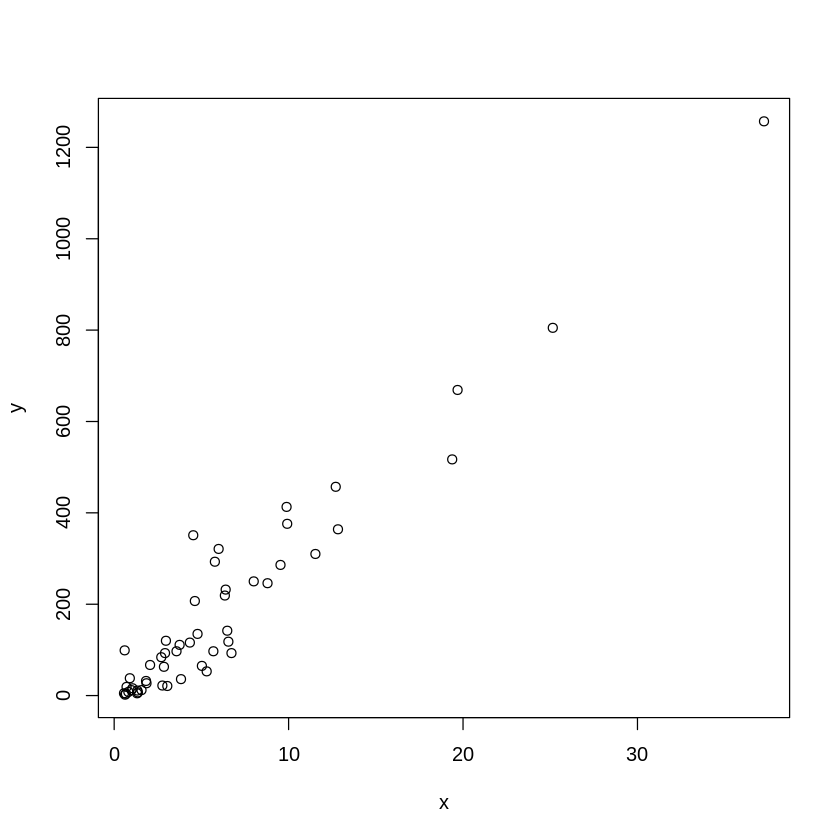

In [ ]:
x <- murders$population / 10^6
y <- murders$total
plot(x,y)

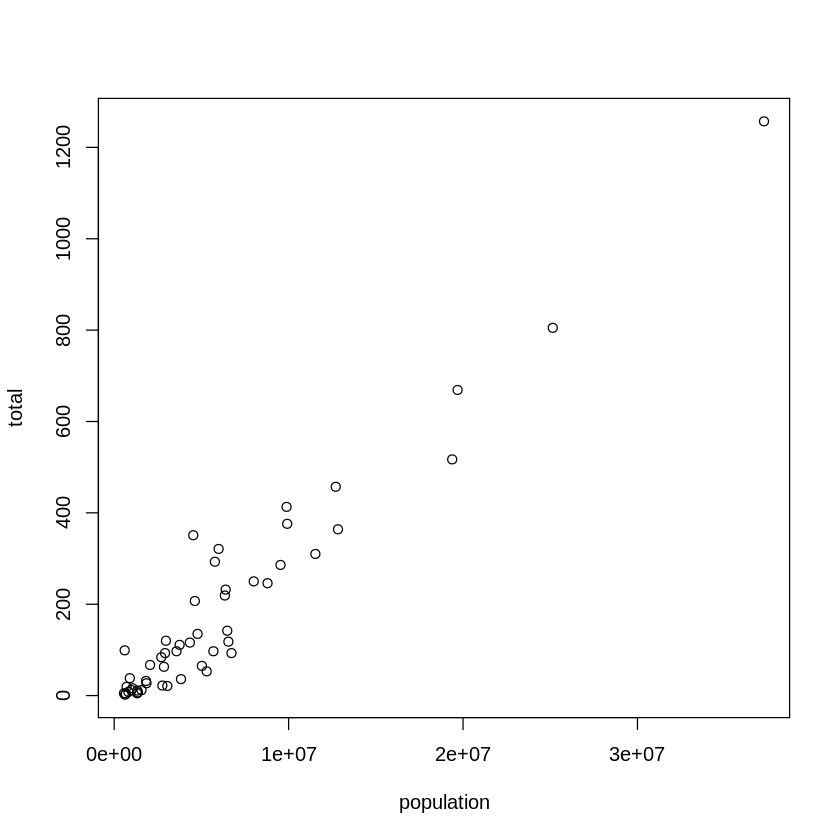

In [ ]:
with(murders, plot(population, total))

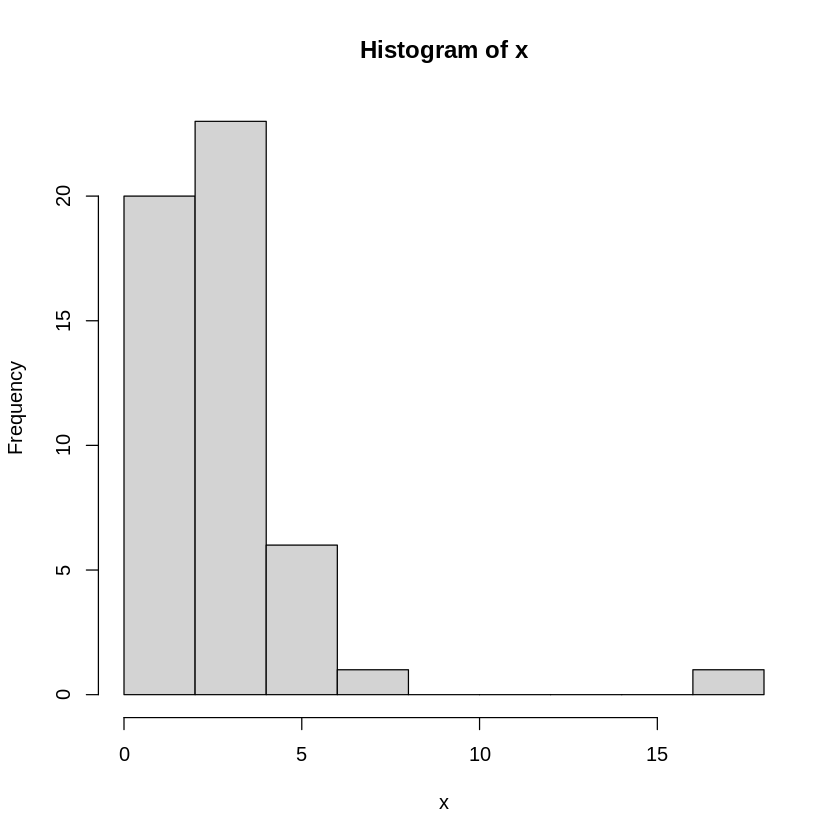

In [ ]:
x <- with(murders, total / population * 100000)
hist(x)

#Gráficos com `ggplot`

Para construir gráficos mais complexos e interessantes utiliza-se as biblioteca ggplot, embora o D3.js seja mais flexível e poderoso que o R o mesmo demora mais tempo para gerar um gráfico (plot). A bliblioteca dplyr servirá para realizamos algumas consultas no dataset.

In [ ]:
library(dplyr)
library(ggplot2)

Os elementos principais para se utilizar o ggplot são:
- Dados
- Geometria: qual a forma dos dados
- Aesthetic mapping (mapeamento estético): legendas, elementos gráficos, eixo, ...

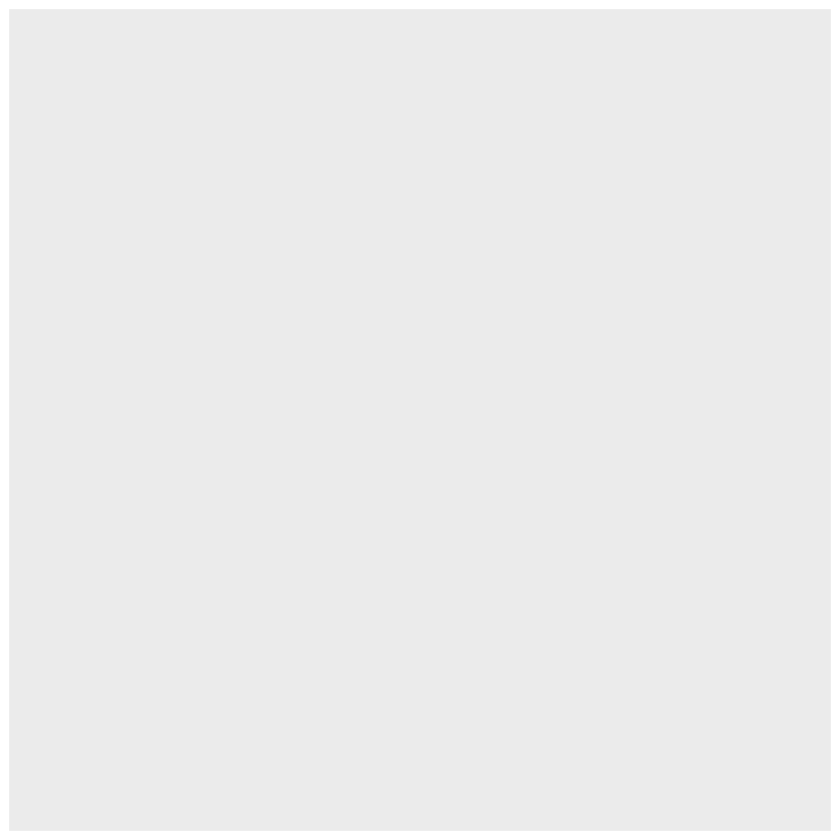

In [ ]:
murders %>% ggplot()

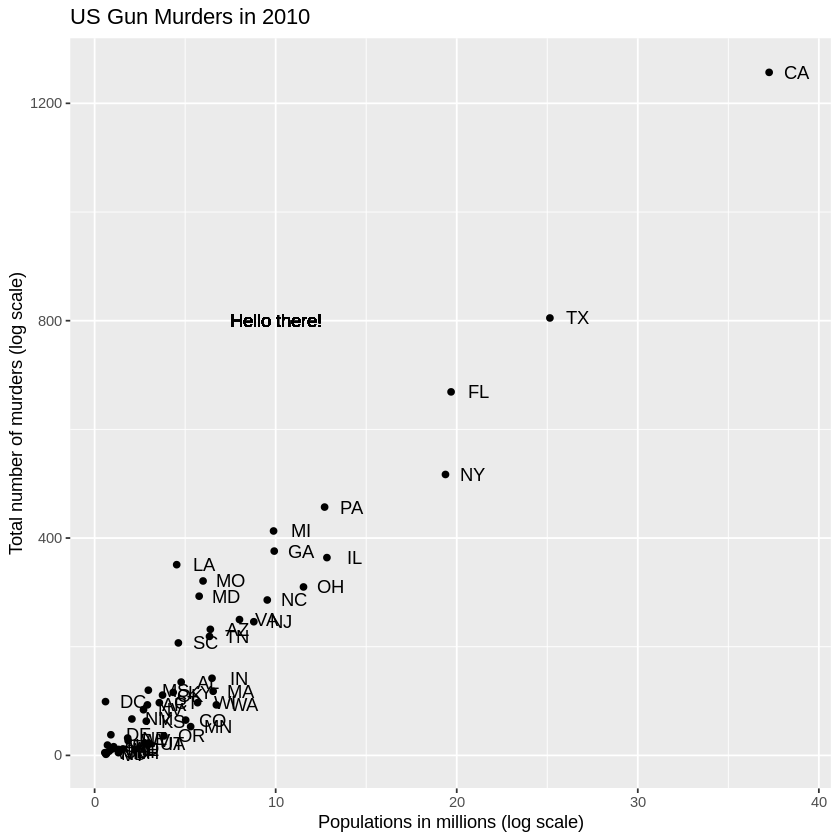

In [ ]:
murders %>% ggplot() +
geom_point(aes(x = population/10^6, y = total)) + geom_text(aes(population/10^6, total, label = abb), nudge_x = 1.5) + geom_text(aes(x = 10, y = 800, label = "Hello there!"))+ xlab("Populations in millions (log scale)") + ylab("Total number of murders (log scale)") + ggtitle("US Gun Murders in 2010")